In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../utils')
from GridWorld import get_standard_grid, get_negative_grid
from iterative_policy_eval import printValues, printPolicy

In [2]:
THRESHOLD = 1e-3
GAMMA = 0.9
ALPHA = 0.1
ACTIONS = ('U', 'D', 'L', 'R')

In [3]:
def epsilon_greedy(policy, s, eps=0.1):
    p = np.random.random()
    if p < (1 - eps):
        return policy[s]
    else:
        return np.random.choice(ACTIONS)

rewards:
-------------------------
 0.00| 0.00| 0.00| 1.00|
-------------------------
 0.00| 0.00| 0.00|-1.00|
-------------------------
 0.00| 0.00| 0.00| 0.00|


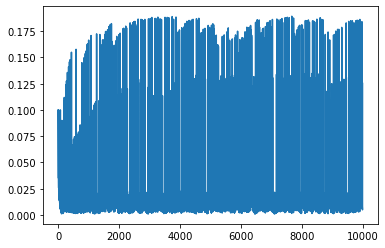

values:
-------------------------
 0.70| 0.83| 0.97| 0.00|
-------------------------
 0.62| 0.00|-0.99| 0.00|
-------------------------
 0.42|-0.78|-0.88|-1.00|
policy:
-------------------------
 R | R | R |   |
-------------------------
 U |   | R |   |
-------------------------
 U | R | R | U |


In [4]:
grid = get_standard_grid()

print("rewards:")
printValues(grid.rewards, grid)

policy = {
    (2, 0): 'U',
    (1, 0): 'U',
    (0, 0): 'R',
    (0, 1): 'R',
    (0, 2): 'R',
    (1, 2): 'R',
    (2, 1): 'R',
    (2, 2): 'R',
    (2, 3): 'U'
}

V = {}
states = grid.all_states()
for s in states:
    V[s] = 0

deltas = []
n_episodes = 10000

for it in range(n_episodes):
    s = grid.reset()
    delta = 0

    while not grid.game_over():
        a = epsilon_greedy(policy, s)

        r = grid.move(a)
        s_next = grid.current_state()

        v_old = V[s]
        V[s] = V[s] + ALPHA * (r + GAMMA * V[s_next] - V[s])
        delta = max(delta, np.abs(V[s] - v_old))

        s = s_next

    deltas.append(delta)

plt.plot(deltas)
plt.show()

print("values:")
printValues(V, grid)

print("policy:")
printPolicy(policy, grid)
